In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import string

file='film.csv'

df=pd.DataFrame(pd.read_csv(file))
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2615046
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2200215
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2946971
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1409099
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1483869


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432295 entries, 0 to 432294
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    432295 non-null  int64  
 1   title                 432295 non-null  object 
 2   vote_average          432295 non-null  float64
 3   vote_count            432295 non-null  int64  
 4   status                432295 non-null  object 
 5   release_date          414562 non-null  object 
 6   revenue               432295 non-null  int64  
 7   runtime               432295 non-null  int64  
 8   adult                 432295 non-null  bool   
 9   backdrop_path         183573 non-null  object 
 10  budget                432295 non-null  int64  
 11  homepage              54111 non-null   object 
 12  tconst                432295 non-null  object 
 13  original_language     432295 non-null  object 
 14  original_title        432295 non-null  object 
 15  

In [30]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,averageRating,numVotes
count,4.322950e+05,432295.000000,432295.000000,4.322950e+05,432295.000000,4.322950e+05,432295.000000,432295.000000,4.322950e+05
mean,4.781282e+05,3.624079,49.289115,1.648859e+06,66.506976,6.409536e+05,2.215292,6.248331,2.814338e+03
std,3.433845e+05,3.142025,515.011470,2.598421e+07,63.234720,7.125117e+06,11.391053,1.315747,3.167942e+04
min,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,5.000000e+00
25%,2.070075e+05,0.000000,0.000000,0.000000e+00,15.000000,0.000000e+00,0.600000,5.500000,2.000000e+01
50%,4.133320e+05,4.700000,1.000000,0.000000e+00,80.000000,0.000000e+00,0.866000,6.300000,5.900000e+01
75%,6.902115e+05,6.200000,6.000000,0.000000e+00,96.000000,0.000000e+00,1.673000,7.100000,2.620000e+02
max,1.390572e+06,10.000000,34495.000000,2.923706e+09,14400.000000,8.880000e+08,2994.357000,10.000000,2.965480e+06


In [31]:
df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date             17733
revenue                      0
runtime                      0
adult                        0
backdrop_path           248722
budget                       0
homepage                378184
tconst                       0
original_language            0
original_title               0
overview                 41057
popularity                   0
poster_path              73969
tagline                 341365
genres                   76873
production_companies    170168
production_countries    110756
spoken_languages        100832
keywords                261594
directors                10355
writers                  67081
averageRating                0
numVotes                     0
dtype: int64

In [32]:
for col in df:
    print(col, df[col].nunique() ,"elementi unici")

id 432185 elementi unici
title 373346 elementi unici
vote_average 4996 elementi unici
vote_count 3598 elementi unici
status 6 elementi unici
release_date 39509 elementi unici
revenue 13543 elementi unici
runtime 553 elementi unici
adult 2 elementi unici
backdrop_path 183290 elementi unici
budget 4014 elementi unici
homepage 52836 elementi unici
tconst 431446 elementi unici
original_language 158 elementi unici
original_title 391936 elementi unici
overview 388991 elementi unici
popularity 19439 elementi unici
poster_path 357492 elementi unici
tagline 89481 elementi unici
genres 10493 elementi unici
production_companies 135934 elementi unici
production_countries 8294 elementi unici
spoken_languages 5937 elementi unici
keywords 113884 elementi unici
directors 160255 elementi unici
writers 260537 elementi unici
averageRating 91 elementi unici
numVotes 19344 elementi unici


In [33]:
df.averageRating

0         8.8
1         8.7
2         9.0
3         7.9
4         8.0
         ... 
432290    7.1
432291    5.7
432292    7.4
432293    5.9
432294    7.4
Name: averageRating, Length: 432295, dtype: float64

In [34]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'tconst', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'directors', 'writers', 'averageRating', 'numVotes'],
      dtype='object')

In [35]:
categorie_da_droppare = ['id','backdrop_path','homepage','tconst','poster_path','tagline']



df.drop(categorie_da_droppare, axis=1, inplace=True)

PAIRPLOT DELLE COLONNE SELEZIONATE



C:\Users\ianni\AppData\Local\Temp\ipykernel_22912\1131683528.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(df[lista][df['budget']> 0][df['revenue']> 0][df['averageRating'] > 0], diag_kind='kde', plot_kws={'linewidth': 0, 'size': 0.1, 'alpha': 0.01})
C:\Users\ianni\AppData\Local\Temp\ipykernel_22912\1131683528.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(df[lista][df['budget']> 0][df['revenue']> 0][df['averageRating'] > 0], diag_kind='kde', plot_kws={'linewidth': 0, 'size': 0.1, 'alpha': 0.01})


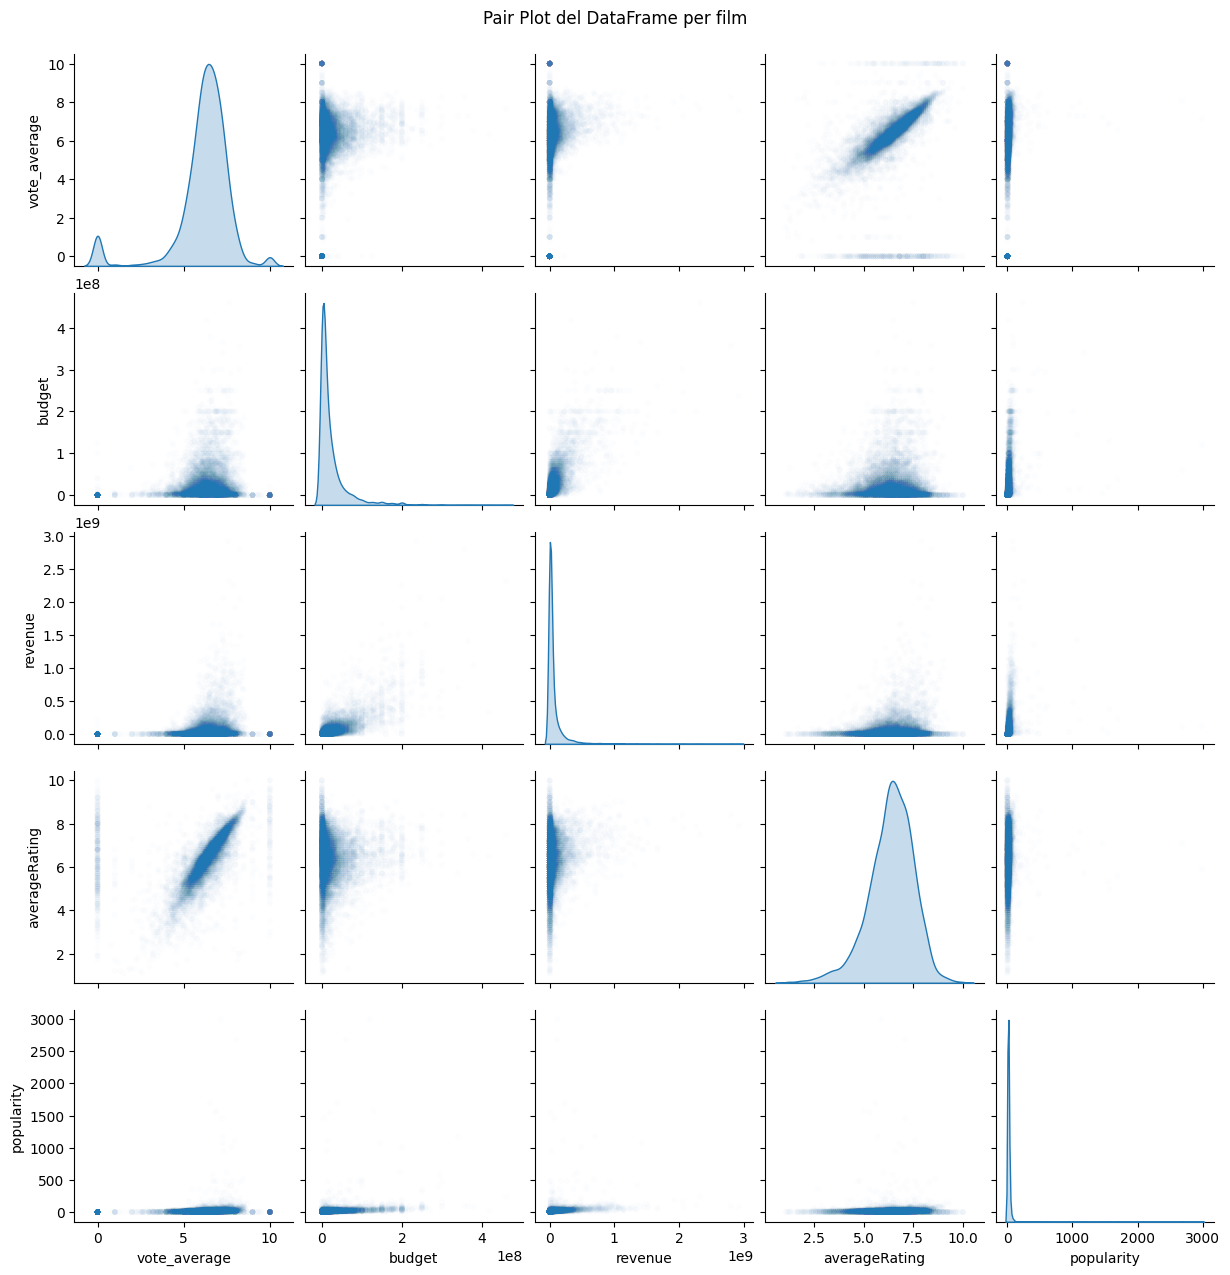

In [36]:
lista = ['vote_average','budget','revenue','averageRating','popularity']

sns.pairplot(df[lista][df['budget']> 0][df['revenue']> 0][df['averageRating'] > 0], diag_kind='kde', plot_kws={'linewidth': 0, 'size': 0.1, 'alpha': 0.01})
plt.suptitle('Pair Plot del DataFrame per film', y=1.02)
plt.show()

## BAR PLOT DEI BUDGET E INCASSI MEDI PER ANNO

### Come si può notare anche nel pair plot ci sono zone di budget e revenue con valori zero, soprattutto nei primi anni, tra il 1874 e il 1912. Con l'avanzare degli anni, superata la fase delle guerre, cresce il budget medio ma crescono principalmente anche gli incassi. E' visibile una flessione degli incassi intorno agli anni 2020-2021, dovuta sostanzialmente al periodo di pandemia globale.

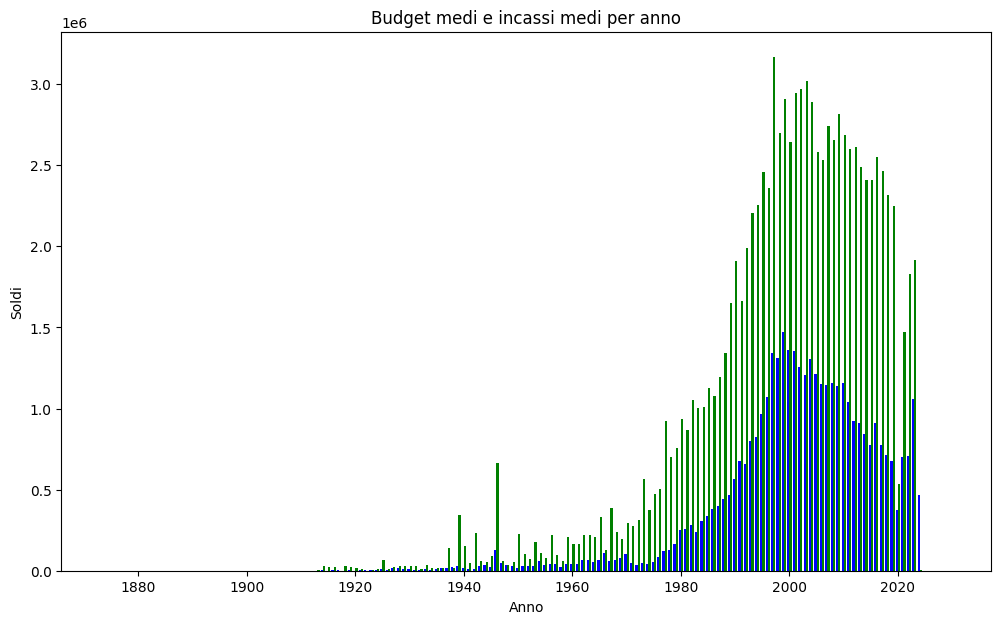

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Conversione della colonna 'release_date' in formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Rimuovere righe con valori nulli nelle colonne 'budget' e 'revenue'
df.dropna(subset=['budget', 'revenue'], inplace=True)

# Calcolo dei budget medi e degli incassi medi per anno
result = df.groupby('year')[['budget', 'revenue']].mean().reset_index()

# Creazione del grafico
plt.figure(figsize=(12, 7))
plt.bar(result['year'] - 0.2, result['budget'], width=0.4, label='Budget medio', color='blue')
plt.bar(result['year'] + 0.2, result['revenue'], width=0.4, label='Incasso medio', color='green')

plt.xlabel('Anno')
plt.ylabel('Soldi')
plt.title('Budget medi e incassi medi per anno')
plt.show()



## DIFFERENZA PERCENTUALE TRA REVENUE MEDIO E BUDGET MEDIO PER ANNO

### In questo plot è visibile la differenza percentuale tra il revenue medio e il budget medio per anno. Le differenze sono notevoli negli anni di osservazione 1920-1950, arrivando circa al 2000 %.Queste differenze si stabilizzano negli anni successivi, con un picco oltre il 1000% intorno al 1970. Avanzano gli anni, cresce il budget medio speso per film, ma proporzionalmente crescono gli incassi e questa differenza percentuale si assesta tra 150 % e 250%, scendendo poi ad un valore negativo nel periodo Covid

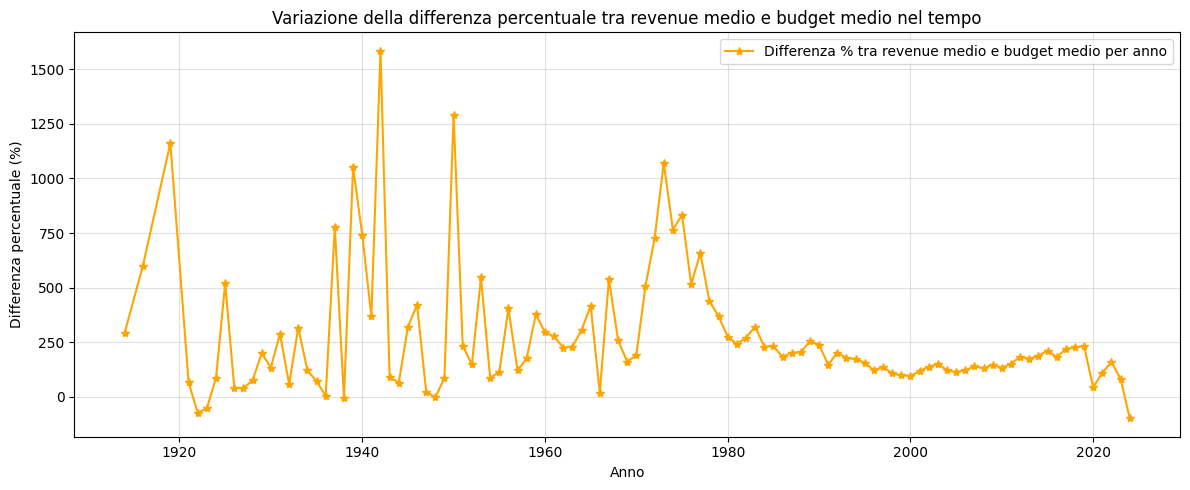

In [42]:
result['diff_percent'] = (result['revenue'] - result['budget']) / result['budget'] * 100
result[['budget', 'revenue', 'diff_percent']].describe()

result1 = result[(result['budget'] > 1000) & (result['revenue'] > 1000)]
plt.figure(figsize=(12, 5))
plt.plot(result1['year'], result1['diff_percent'], marker='*', label='Differenza % tra revenue medio e budget medio per anno', color='orange')

plt.xlabel('Anno')
plt.ylabel('Differenza percentuale (%)')
plt.title('Variazione della differenza percentuale tra revenue medio e budget medio nel tempo')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()




## LETTERA INIZIALE PIU POPOLARE NEI TITOLI DEI FILM




### Il dato è abbastanza intuibile, i film principalmente inziano per 'T' o molto più esplicitamente per 'The'. Con un pie chart si vanno a rappresentare le 5 lettere più popolari in percentuale: dopo la 'T,' più distaccata si trova la S e subito dopo seguono 'A', 'M', 'B'

Titoli che iniziano con 'A': 30820
Titoli che iniziano con 'B': 23977
Titoli che iniziano con 'C': 21038
Titoli che iniziano con 'D': 22460
Titoli che iniziano con 'E': 11398
Titoli che iniziano con 'F': 14561
Titoli che iniziano con 'G': 11083
Titoli che iniziano con 'H': 15710
Titoli che iniziano con 'I': 12303
Titoli che iniziano con 'J': 7090
Titoli che iniziano con 'K': 8968
Titoli che iniziano con 'L': 22030
Titoli che iniziano con 'M': 24828
Titoli che iniziano con 'N': 10261
Titoli che iniziano con 'O': 9349
Titoli che iniziano con 'P': 17212
Titoli che iniziano con 'Q': 1057
Titoli che iniziano con 'R': 13365
Titoli che iniziano con 'S': 34366
Titoli che iniziano con 'T': 80881
Titoli che iniziano con 'U': 5097
Titoli che iniziano con 'V': 5461
Titoli che iniziano con 'W': 13435
Titoli che iniziano con 'X': 319
Titoli che iniziano con 'Y': 2937
Titoli che iniziano con 'Z': 1907


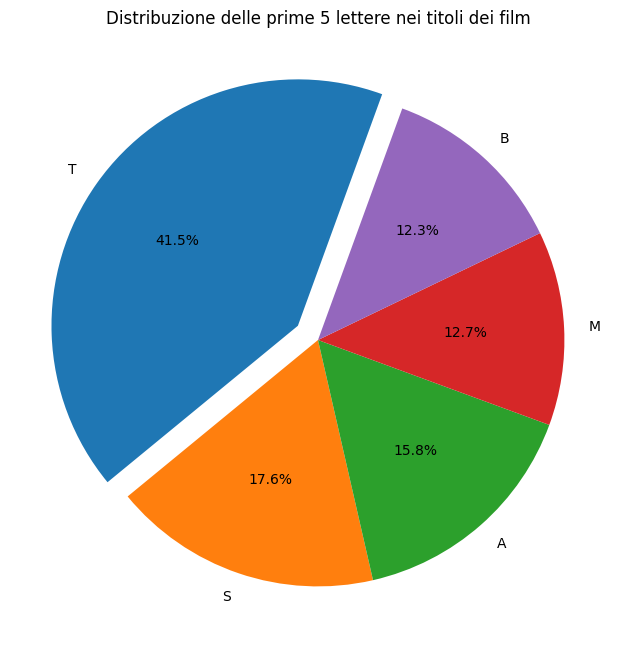

In [43]:
count_lettere= {letter: df['title'].str.startswith(letter, na=False).sum() for letter in string.ascii_uppercase}

for letter, count in count_lettere.items():
    print(f"Titoli che iniziano con '{letter}': {count}")

top_5_letters = dict(sorted(count_lettere.items(), key=lambda item: item[1], reverse=True)[:5])

plt.figure(figsize=(8, 8))
explode=[0.1,0,0,0,0]
plt.pie(top_5_letters.values(), labels=top_5_letters.keys(), autopct='%1.1f%%', startangle=70, explode=explode)
plt.title('Distribuzione delle prime 5 lettere nei titoli dei film')
plt.show()

## GENERI PIù POPOLARI.

### Dalla colonna ''genres', sono stati estratti tutti i generi presenti. Domina il genere 'Drama', seguito da 'Comedy'.

In [ ]:
df['genres'] = df['genres'].dropna()


lista_generi = []

for generi in df['genres']:
    if isinstance(generi, str) and generi:  
        generi1 = generi.split(',') 
        for genere in generi1:
            lista_generi.append(genere.strip())

genre_series = pd.Series(lista_generi).value_counts()

print(genre_series)




Drama              139989
Comedy              90264
Documentary         59475
Romance             36123
Thriller            32751
Action              29909
Horror              29814
Animation           25047
Crime               24393
TV Movie            18007
Family              17678
Adventure           16534
Music               16484
Fantasy             13408
Science Fiction     13364
Mystery             12422
History             10212
War                  7327
Western              6349
Name: count, dtype: int64


## SCATTER PLOT DELLA POPOLARITA PER I PRIMI DUE GENERI


### Si può notare come la maggior parte dei punti per entrambi i generi è concentrata nella zona 0-500. Drama però ha un picco di popolarità molto più elevato rispetto a Comedy, oltre 2500 contro i 1000-1100 di Comedy.

C:\Users\ianni\AppData\Local\Temp\ipykernel_22912\3209560061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genere'] = df1['genres'].apply(lambda x: 'Drama' if 'Drama' in x else 'Comedy')


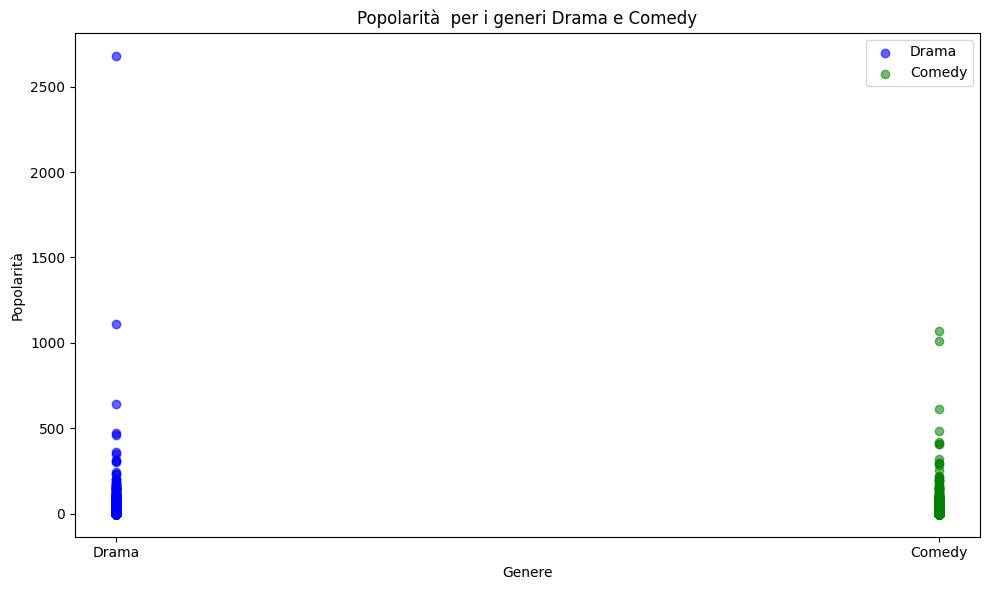

In [ ]:
df1 = df[df['genres'].str.contains('Drama', case=False, na=False) | df['genres'].str.contains('Comedy', case=False, na=False)]


df1['genere'] = df1['genres'].apply(lambda x: 'Drama' if 'Drama' in x else 'Comedy')

plt.figure(figsize=(10, 6))

plt.scatter(df1[df1['genere'] == 'Drama']['genere'], 
            df1[df1['genere'] == 'Drama']['popularity'], 
            color='blue', label='Drama', alpha=0.6)


plt.scatter(df1[df1['genere'] == 'Comedy']['genere'], 
            df1[df1['genere'] == 'Comedy']['popularity'], 
            color='green', label='Comedy', alpha=0.55)


plt.title('Popolarità  per i generi Drama e Comedy')
plt.xlabel('Genere')
plt.ylabel('Popolarità')


plt.legend()

plt.tight_layout()
plt.show()



## VOTE AVERAGE PER GENERI DRAMA E COMEDY

### Lo scatter plot mostra sostanzialmente una sostanziale parità dei vote average(ovvero la media dei voti dati dagli utenti) per i generi Drama e Comedy. 

C:\Users\ianni\AppData\Local\Temp\ipykernel_22912\520970001.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genere'] = df1['genres'].apply(lambda x: 'Drama' if 'Drama' in x else 'Comedy')


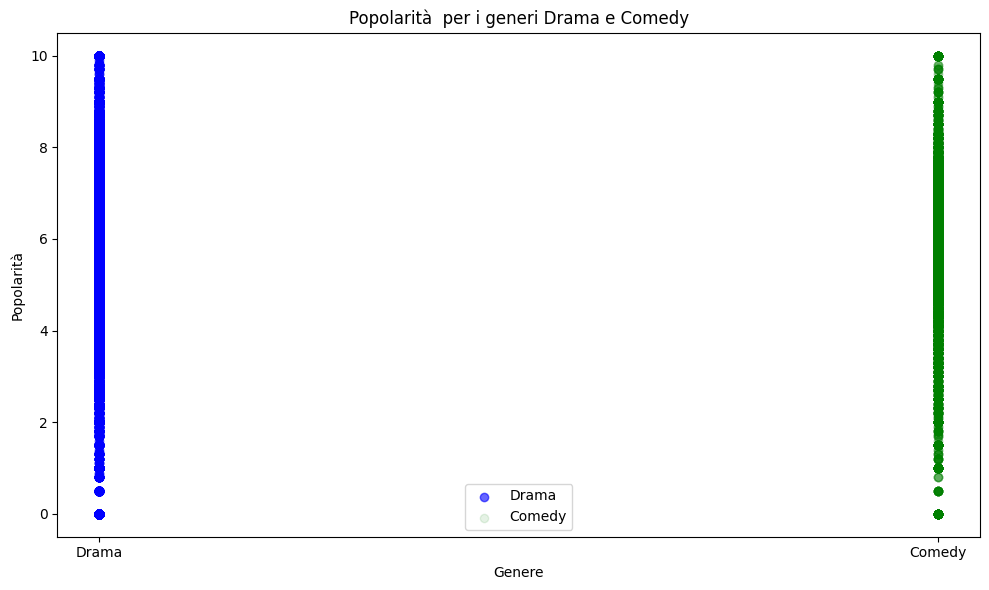

In [ ]:

df1 = df[df['genres'].str.contains('Drama', case=False, na=False) | df['genres'].str.contains('Comedy', case=False, na=False)]



df1['genere'] = df1['genres'].apply(lambda x: 'Drama' if 'Drama' in x else 'Comedy')


plt.figure(figsize=(10, 6))

plt.scatter(df1[df1['genere'] == 'Drama']['genere'], 
            df1[df1['genere'] == 'Drama']['vote_average'], 
            color='blue', label='Drama', alpha=0.6)


plt.scatter(df1[df1['genere'] == 'Comedy']['genere'], 
            df1[df1['genere'] == 'Comedy']['vote_average'],  
            color='green', label='Comedy', alpha=0.1)

plt.title('Vote_average  per i generi Drama e Comedy')
plt.xlabel('Genere')
plt.ylabel('Popolarità')

plt.legend()

plt.tight_layout()
plt.show()

INCASSI MEDI PER ANNO PER I GENERI DRAMA E COMEDY

Inizialmente, Drama incassava di più rispetto ai film Comedy, dovuta probabilmente ad una maggiore produzione di film Drama. Negli anni successivi è nettamente visibile come Comedy ha avuto un incasso medio molto superiore a Drama, toccando anche i 6 milioni di euro contro i 4 di picco massimo per Drama. Gli incassi sono scesi poi nel periodo Covid.

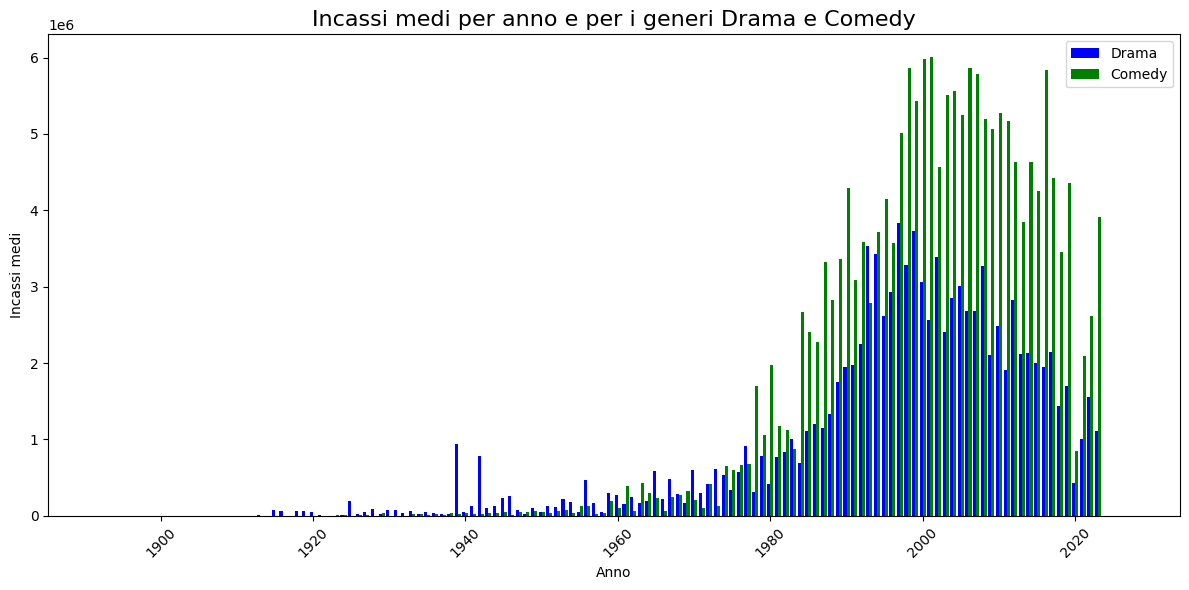

In [ ]:

incassi_medi_per_anno = df1.groupby(['year', 'genere'])['revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))

colors = {'Drama': 'blue', 'Comedy': 'green'}


for genere in ['Drama', 'Comedy']:
    data_genere = incassi_medi_per_anno[incassi_medi_per_anno['genere'] == genere]
    plt.bar(data_genere['year'] - 0.2 if genere == 'Drama' else data_genere['year'] + 0.2, 
            data_genere['revenue'], 
            width=0.4, 
            label=genere, 
            color=colors[genere])
plt.title('Incassi medi per anno e per i generi Drama e Comedy')
plt.xlabel('Anno')
plt.ylabel('Incassi medi')
plt.xticks(rotation=45)


plt.legend()


plt.tight_layout()
plt.show()




Nei bar plot per il budget medio annuale si può notare come nei primi anni il budget speso resta contenuto e forse Drama ha una spesa maggiore.Col passare degli anni, aumenta il budgget e si evince come per i film Comedy il budget medio è quasi sempre più elevato.

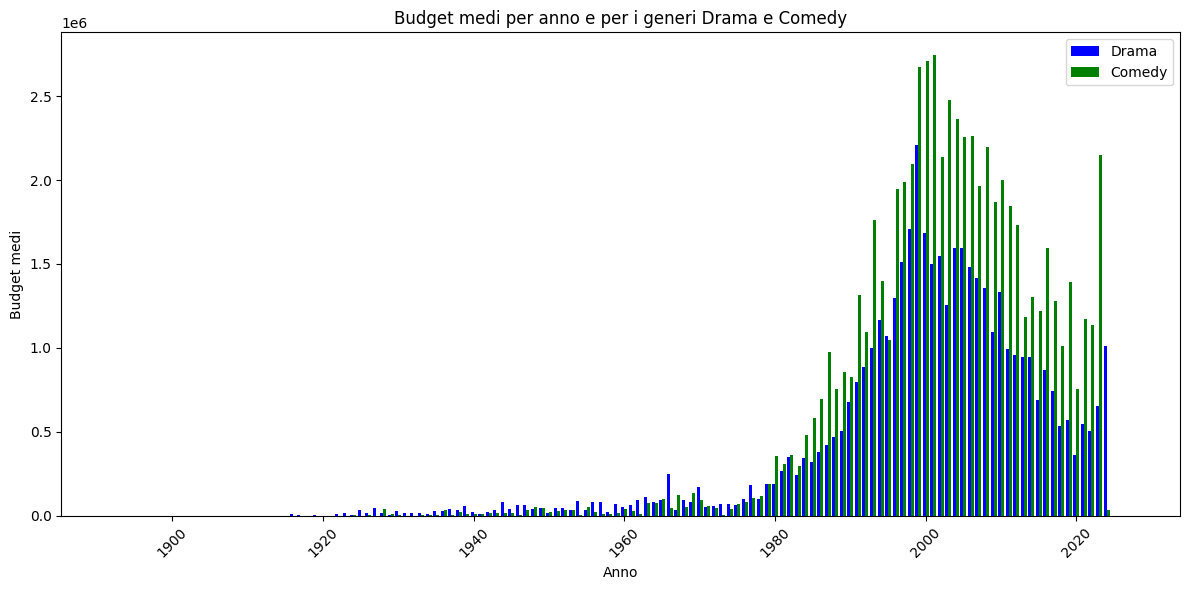

In [74]:
budget_medi_per_anno = df1.groupby(['year', 'genere'])['budget'].mean().reset_index()

# Creare il bar plot
plt.figure(figsize=(12, 6))

# Creare una lista per i colori delle barre
colors = {'Drama': 'blue', 'Comedy': 'green'}

# Creare le barre per ogni anno e genere
for genere in ['Drama', 'Comedy']:
    data_genere = budget_medi_per_anno[budget_medi_per_anno['genere'] == genere]
    plt.bar(data_genere['year'] - 0.2 if genere == 'Drama' else data_genere['year'] + 0.2, 
            data_genere['budget'],  # Usare 'budget' invece di 'revenue'
            width=0.4, 
            label=genere, 
            color=colors[genere])

# Titolo e etichette
plt.title('Budget medi per anno e per i generi Drama e Comedy')
plt.xlabel('Anno')
plt.ylabel('Budget medi')

# Ruotiamo le etichette degli anni per migliorare la leggibilità
plt.xticks(rotation=45)

# Legenda
plt.legend()

# Visualizzare il grafico
plt.tight_layout()
plt.show()


# CASE DI PRODUZIONE COL MAGGIOR NUMERO DI FILM 


In [77]:
df['production_companies'] = df['production_companies'].dropna()

# Ora, per ogni valore valido, separiamo i generi
lista_produzioni = []

for x in df['production_companies']:
    if isinstance(x, str) and x:  # Se il valore è una stringa non vuota
        produzioni = x.split(',')  # Separiamo con la virgola
        for x in produzioni :
            lista_produzioni.append(x.strip())  # Aggiungiamo ogni genere separato

# Conta la frequenza dei generi
produzioni_series = pd.Series(lista_produzioni).value_counts()

# Stampa i risultati
print(produzioni_series)

Warner Bros. Pictures    2947
Metro-Goldwyn-Mayer      2774
Columbia Pictures        2588
Paramount                2310
Universal Pictures       2154
                         ... 
Deluxe                      1
No Problem Sonido           1
Abramovic                   1
Saturno Filmes              1
Taganka Film                1
Name: count, Length: 107172, dtype: int64


Dal DataFrame realizzato con le 5 case di produzione più popolari, sono stati stampati budget medio, incasso medio,popolarità media. Per incasso medio ma anche per un guadagno medio domina
Metro-Goldwyn-Maye, per budget medio speso Columbia Pictures che però ha un guadagno medio abbastanza negativo. Per popolarità media Universal Pictures, seguita da Warner Bros, che nonostante produca più film ,ha una spesa e un guadagno comunque comtenuto

In [82]:
top_5_produzioni = produzioni_series.head(5).index

# Creare una lista per i risultati
lista1 = []

# Iteriamo sulle prime 5 compagnie di produzione
for produzione in top_5_produzioni:
    # Filtro per i film prodotti da questa compagnia
    df2 = df[df['production_companies'].str.contains(produzione, na=False)]
    
    # Calcolare le statistiche per questa compagnia
    budget_medio = df2['budget'].mean()
    incasso_medio = df2['revenue'].mean()
    popolarita_media = df2['popularity'].mean()
    
    # Estrazione dei direttori più frequenti
    if not df2['directors'].isna().all():  # Verifica che ci siano dei direttori
        direttori = df2['directors'].dropna().str.split(',').explode().str.strip()
        count = direttori.value_counts()
        top_direttori = count.head(1).index[0] if not count.empty else None
    else:
        top_direttori = None
    
    # Appendiamo i risultati
    lista1.append({
        'Produzione': produzione,
        'Budget Medio': budget_medio,
        'Incasso Medio': incasso_medio,
        'Popolarità Media': popolarita_media,
        'Top Direttore': top_direttori
    })

# Convertiamo i risultati in un dataframe
df_lista = pd.DataFrame(lista1)

# Mostriamo il risultato
print(df_lista)

              Produzione  Budget Medio  Incasso Medio  Popolarità Media  \
0  Warner Bros. Pictures  1.081325e+07   2.726546e+07          9.456299   
1    Metro-Goldwyn-Mayer  3.236386e+06   7.610497e+06          4.727119   
2      Columbia Pictures  7.817771e+06   2.181746e+07          7.565412   
3              Paramount  7.732669e+06   2.255795e+07          7.489902   
4     Universal Pictures  1.059795e+07   3.395433e+07          9.684174   

     Top Direttore  
0     Friz Freleng  
1    William Hanna  
2      Jules White  
3  Seymour Kneitel  
4       Ray Taylor  


## 5 PAESI COL MAGGIOR NUMERO DI PRODUZIONI

### Il paese con maggior produzione sono chiaramente gli Usa, che dominano anche per incasso medio, budget medio e guadagno

In [92]:

lista_paesi1 = []

for paese in top_5_paesi:
    df2 = df[df['production_countries'].str.contains(paese, na=False)]

    budget_medio = df2['budget'].mean()
    incasso_medio = df2['revenue'].mean()
    
    guadagno_medio = incasso_medio - budget_medio
    if guadagno_medio < 0:
        guadagno_medio = -abs(guadagno_medio)  
    
    num_films = df2.shape[0]

    lista_paesi1.append({
        'Paese': paese,
        'Numero di Produzioni': num_films,
        'Budget Medio': budget_medio,
        'Incasso Medio': incasso_medio,
        'Guadagno Medio': guadagno_medio
    })
df_paesi = pd.DataFrame(lista_paesi1)

print(df_paesi)


                      Paese  Numero di Produzioni  Budget Medio  \
0  United States of America                110098  2.137544e+06   
1                    France                 24817  8.091563e+05   
2            United Kingdom                 23178  1.674410e+06   
3                   Germany                 22458  8.315884e+05   
4                     India                 14937  4.595675e+05   

   Incasso Medio  Guadagno Medio  
0   5.721549e+06    3.584005e+06  
1   1.237039e+06    4.278825e+05  
2   4.122305e+06    2.447895e+06  
3   1.486033e+06    6.544450e+05  
4   9.403921e+05    4.808246e+05  
